In [1]:
import fastbook

In [2]:
fastbook.setup_book()

In [3]:
from fastbook import *

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


In [5]:
path = Path('images/Images')

In [6]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [7]:
dls = bears.dataloaders(path)

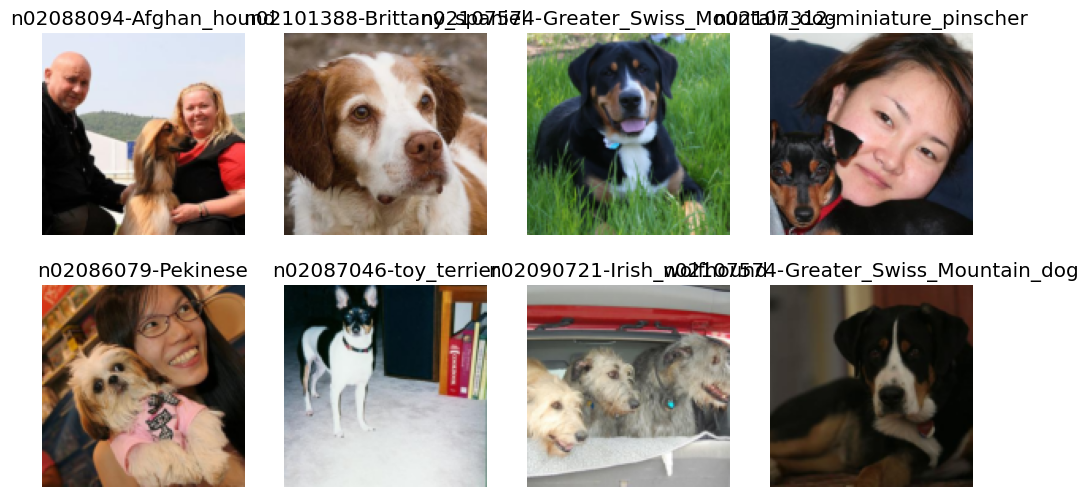

In [8]:
dls.valid.show_batch(max_n=8, nrows=2)

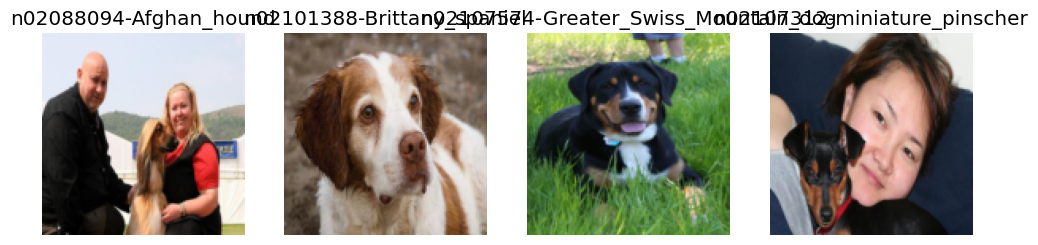

In [9]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

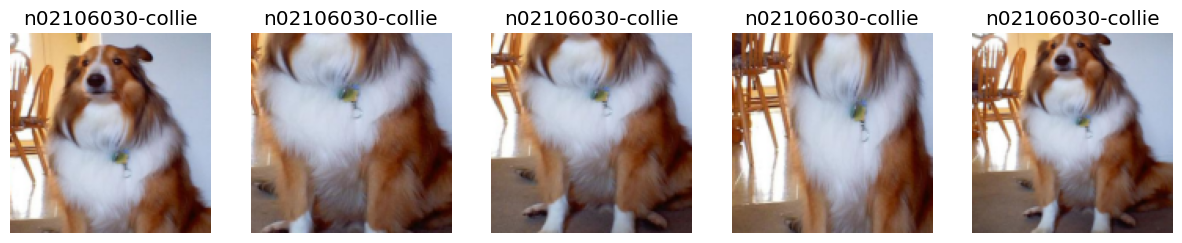

In [10]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path,bs=5)
dls.train.show_batch(max_n=6, nrows=1, unique=True)

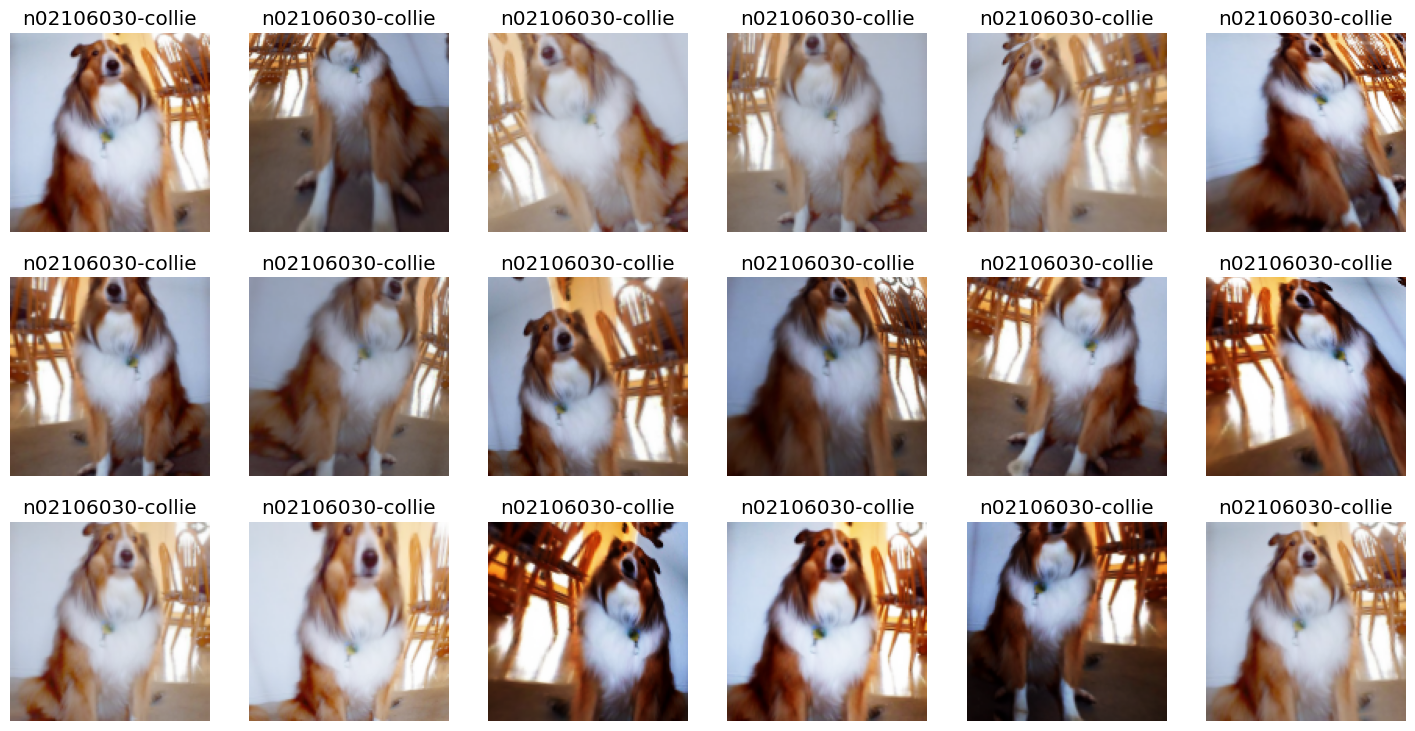

In [11]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path,bs=64)
dls.train.show_batch(max_n=18, nrows=3, unique=True)

In [12]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [13]:
import timm

In [14]:
learn = vision_learner(dls, 'convnext_tiny_in22k', metrics=accuracy)
learn.fine_tune(4)

c:\Users\kaiqu\miniconda3\envs\tf-env\lib\site-packages\timm\models\_factory.py:126: UserWarning: Mapping deprecated model name convnext_tiny_in22k to current convnext_tiny.fb_in22k.
  model = create_fn(


epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: 

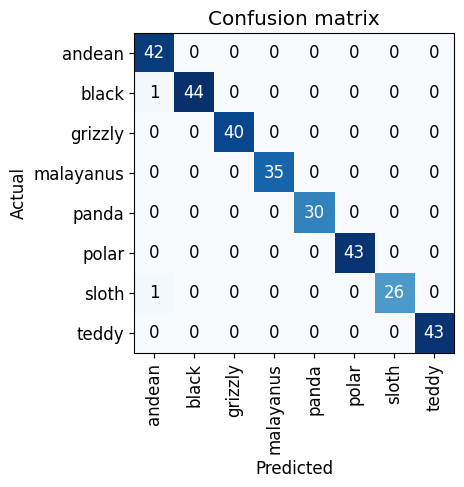

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

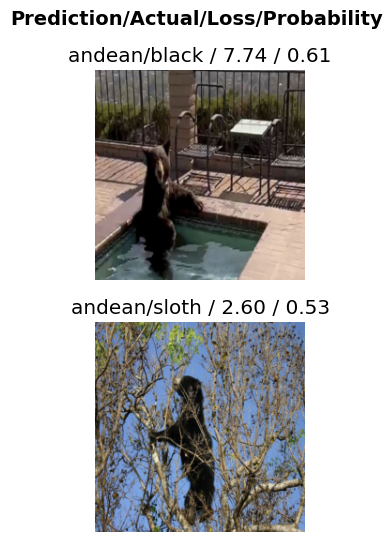

In [ ]:
interp.plot_top_losses(2, nrows=2)

In [ ]:
learn.export()